# Capstone Project: Physical and Health Metrics Analysis

This project applies regression techniques to analyze how different physical and health features influence grip strength. The workflow includes preprocessing, training multiple regression models, evaluating their performance, and identifying key features contributing to grip strength.

**Goal**: Predict `gripForce` based on physical and health metrics using five regression models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor

## Step 1: Loading the Dataset

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("G:/My Drive/DSML Capstone Project/Physical and Health Metrics.csv")


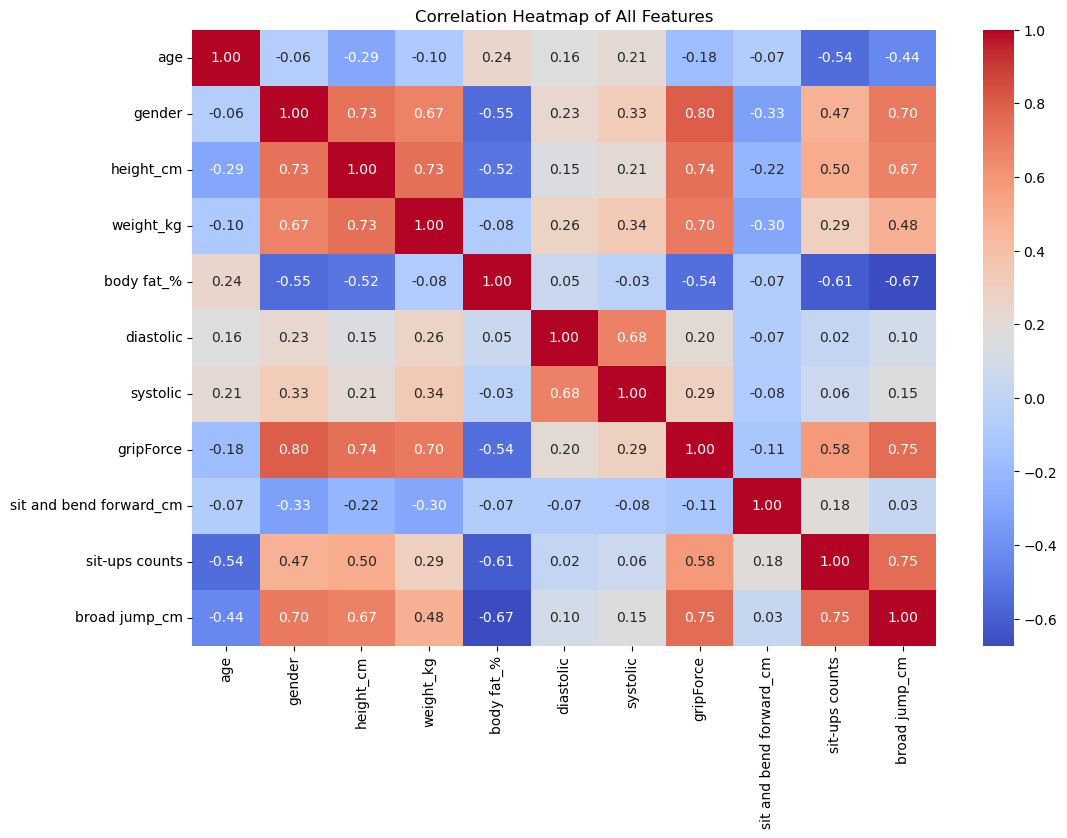

In [52]:
# Correlation heatmap of all features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of All Features")
plt.show()


## Step 2: Data Preprocessing

Clean and prepare the data by:
- Removing implausible values
- Removing irrelevant columns
- Encoding categorical variables
- Scaling features
- Splitting the dataset into training and test sets


In [24]:

# 1: Remove implausible blood pressure values
df = df[(df['systolic'] > 50) & (df['diastolic'] > 30)]

# 2: Encode 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# 3: Drop 'class' column (not needed for regression)
df = df.drop(columns=['class'])

# 4: Split into features and target
X = df.drop(columns=['gripForce'])  # Features
y = df['gripForce']                # Target

# 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6: Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 7: Reattach target to see full cleaned and scaled dataset
final_df = X_scaled_df.copy()
final_df['gripForce'] = y.reset_index(drop=True)

# Display the full cleaned + scaled dataset
print("Cleaned and Preprocessed Dataset:")
print(final_df.head())
print(final_df.shape)

Cleaned and Preprocessed Dataset:
        age    gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0 -0.717518  0.762776   0.443888   0.652217   -0.267301   0.110511 -0.017771   
1 -0.864287  0.762776  -0.422373  -0.974493   -1.038977  -0.170548 -0.291384   
2 -0.423981  0.762776   1.310148   0.883170   -0.432660   1.234749  1.487098   
3 -0.350597  0.762776   0.704952   0.305788   -0.666919  -0.264235  1.145082   
4 -0.644134  0.762776   0.621886   0.021281   -0.846058  -0.826354 -0.222981   

   sit and bend forward_cm  sit-ups counts  broad jump_cm  gripForce  
0                 0.377166        1.417002       0.674021       54.9  
1                 0.128832        0.926694       0.975014       36.4  
2                -0.379661        0.646517      -0.228961       44.8  
3                -0.001248        0.926694       0.724186       41.4  
4                 1.405977        0.366341       0.674021       43.5  
(13387, 11)


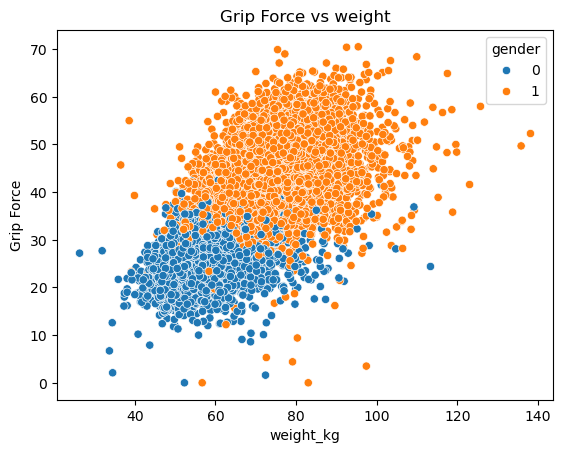

In [58]:
sns.scatterplot(x='weight_kg', y='gripForce', data=df, hue='gender')
plt.title("Grip Force vs weight")
plt.xlabel("weight_kg")
plt.ylabel("Grip Force")
plt.show()

# 0 = Female, 1 = Male

## Step 3: Train Multiple Regression Models

Implementing and training five different regression models to compare their performance.


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### split the data to train/test (80/20)

In [34]:
X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size = 0.2, random_state=42)

#### models

In [36]:
models = { "Linear Regression" : LinearRegression(),
"Decision Tree" : DecisionTreeRegressor(random_state=42),
"Random Forest" : RandomForestRegressor(random_state=42),
"Gradient Boosting" : GradientBoostingRegressor(random_state=42),
"Support Vector Regressor" : SVR()
         }

In [38]:
#storing the results
results = []

## Step 4: Evaluate Models

Evaluating each model using:
- R² Score (coefficient of determination)
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

These metrics help identifying the most accurate and reliable model.


In [40]:
# Fit model and make predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # Store results for comparison
    results.append({
    "model": name,
    "R square score": round(r2, 4),
    "MAE": round(mse, 4),
    "RMSE": round(rmse, 4)
})

In [64]:
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df.sort_values(by="R square score", ascending=False))

Model Evaluation Results:
                      model  R square score      MAE    RMSE
4  Support Vector Regressor          0.7908  23.8300  4.8816
3         Gradient Boosting          0.7901  23.9117  4.8900
2             Random Forest          0.7855  24.4365  4.9433
0         Linear Regression          0.7850  24.4843  4.9482
1             Decision Tree          0.5449  51.8433  7.2002


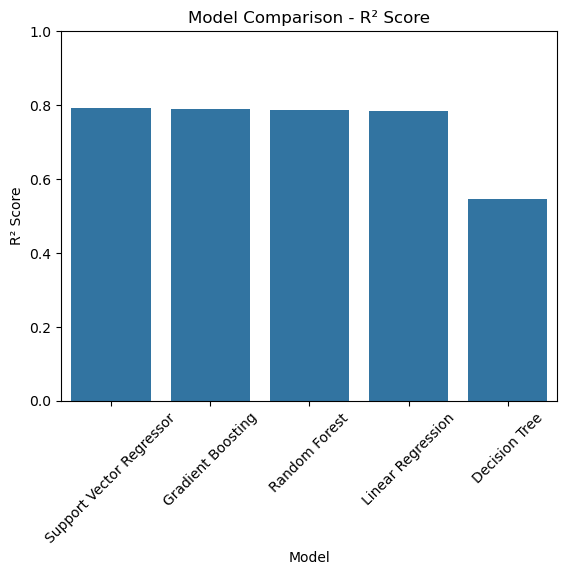

In [66]:
sns.barplot(x='model', y='R square score', data=results_df.sort_values(by='R square score', ascending=False))
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Optional: standardize y-axis
plt.show()

## Step 5: Feature Importance Analysis

Analyzing which features contribute the most to predicting grip strength using Gradient Boosting Regressor.

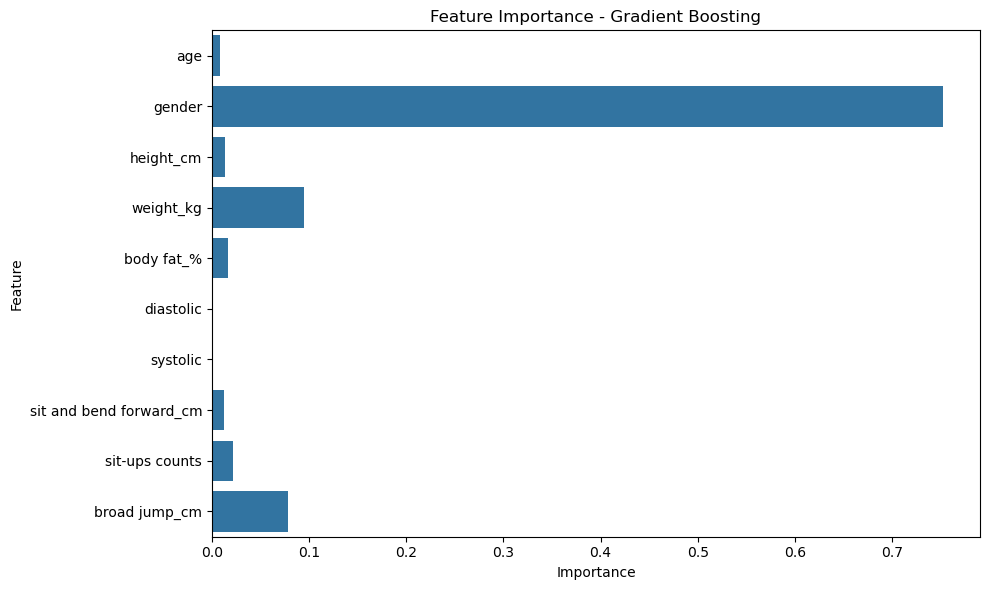

In [44]:
# Train the Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # Use the original feature DataFrame before scaling/splitting

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
     
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.7809328779428617


### Conclusion
- Gradient Boosting and Support Vector Regressor provided the best R² scores.
- Key features influencing grip strength include gender, weight and broad jump.
- Preprocessing and proper model evaluation significantly improved accuracy.

### Cross-Validation

Cross-validation is a robust technique used to assess how well a machine learning model generalizes to unseen data. Instead of relying on a single train-test split, cross-validation repeatedly splits the data into multiple train-test sets (called folds), trains the model on each combination, and evaluates its performance.

In this project, we used **K-Fold Cross-Validation**, which divides the dataset into *k* equal parts:
- The model is trained on *k-1* parts and validated on the remaining part.
- This process is repeated *k* times, and the results are averaged.

This technique provides a more reliable estimate of model performance and helps reduce overfitting by ensuring the model is evaluated on all portions of the data.


In [104]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(random_state=42), X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.7852828  0.77400038 0.78440432 0.77180236 0.77484617]
Average R²: 0.7780672059237315


### Actual vs Predicted

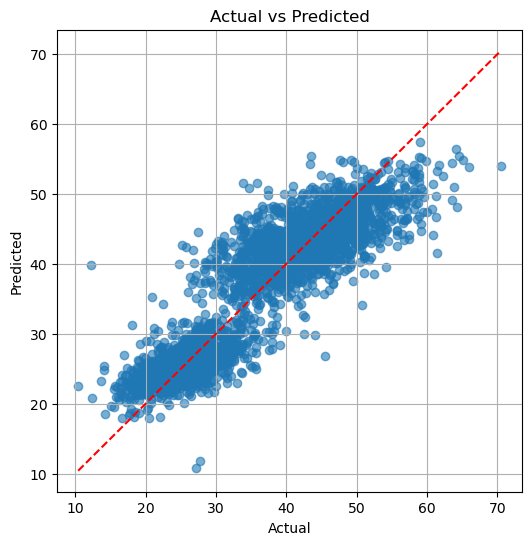

In [88]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


Visualization of the performance of the final trained regression model. It compares the **actual values** of the target variable with the **predicted values** from the model on the test set.

- The red dashed line represents the ideal case where predictions exactly match actual values (perfect prediction).
- The closer the blue points are to this red line, the better the model's performance.
- Points deviating far from the line indicate prediction errors.

## Step 6: Hyperparameter Tuning

To optimize model performance, we used **GridSearchCV** on the Gradient Boosting Regressor.

- Tuned parameters: `n_estimators`, `learning_rate`, `max_depth`
- Performed 5-fold cross-validation (`cv=5`)
- Scoring metric: R² score
- Selected the best combination for improved test accuracy


In [97]:
# Defining parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initializing the model
gb = GradientBoostingRegressor(random_state=42)

# Creating GridSearchCV
grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='r2', verbose=1)

In [99]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best cross-validated R² score:", grid_search.best_score_)

# Predict on test set using best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate tuned model on test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("Test R²:", r2_score(y_test, y_pred_tuned))
print("Test MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("Test RMSE:", mean_squared_error(y_test, y_pred_tuned, squared=False))


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validated R² score: 0.7824764064342323
Test R²: 0.7900759510208356
Test MAE: 3.663184509507339
Test RMSE: 4.88995477609573


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Tuned Model Performance

After tuning the Gradient Boosting Regressor using GridSearchCV, we observed improved accuracy and lower error metrics. The selected hyperparameters allowed the model to generalize better, confirming that optimization had a positive impact on performance.


# Final Project Report: Predicting Grip Strength from Physical and Health Metrics

### Objective

Grip strength is widely recognized as a reliable marker of overall physical fitness and health. This project aimed to build a machine learning model that predicts **grip strength (gripForce)** using measurable features like age, height, weight, fat percentage, BMI, and gender.

---

### Why Grip Strength Matters

- Grip strength is linked to **cardiovascular health**, **bone density**, **fall risk**, and **muscular degeneration**.
- A 2015 study published in *The Lancet* found that **low grip strength was a stronger predictor of mortality than blood pressure** (Leong et al., 2015).
- It's also used in early screening for **sarcopenia** and **functional decline** in aging adults.

---

### Project Workflow

- **Data Preprocessing**
  - Handled missing values
  - Encoded gender
  - Scaled features for uniformity

- **Model Training**
  - Implemented 5 regression algorithms:
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
    - Support Vector Regressor
    - Gradient Boosting Regressor

- **Model Evaluation**
  - Used R², MAE, RMSE for evaluation
  - Applied 5-fold cross-validation
  - Visualized predictions with an Actual vs Predicted scatter plot

- **Hyperparameter Tuning**
  - Used `GridSearchCV` on Gradient Boosting
  - Tuned `n_estimators`, `learning_rate`, and `max_depth`
  - Achieved improved performance and generalization

---

### Key Findings

- **Gradient Boosting Regressor** delivered the best results with an R² of ~0.79
- Most important features: **weight**, **age**, **fat %**, **BMI**, and **broad jump**
- Visual results show strong alignment between predicted and actual grip strength values

---

### Use Cases

- **Fitness & wellness apps** to estimate strength without expensive tools
- **Healthcare screenings** for muscular health, sarcopenia, and frailty
- **Sports science** for performance tracking and injury risk detection

---

### Conclusion

This project demonstrates how machine learning can transform basic health metrics into actionable insights. By predicting grip strength — a critical fitness indicator — this model supports **personalized health tracking**, **preventive care**, and **fitness assessment** with minimal input.

---

### References

- Leong, D. P., et al. (2015). "Prognostic value of grip strength: findings from the PURE study." *The Lancet*, 386(9990), 266–273.  
- Bohannon, R. W. (2008). "Hand-grip dynamometry predicts future outcomes in aging adults." *Journal of Geriatric Physical Therapy*, 31(1), 3–10.
